In [281]:
import pandas as pd
import numpy as np


In [98]:
df1 = pd.read_excel("Analytics_All_Web_Site_Data_AdWords_Search_Queries_20170615-20180302.xlsx",sheet_name="Dataset1")

In [99]:
df2 = pd.read_excel("Analytics_All_Web_Site_Data_AdWords_Search_Queries_20170615-20180302_(1).xlsx",sheet_name="Dataset1")

In [100]:
# remove last row of summary statistics
df1 = df1.iloc[:-1]
df2 = df2.iloc[:-1]

In [101]:
df = df1.append(df2).reset_index().drop('index',axis=1)

In [102]:
df['Revenue/Session'] = df.Revenue /df.Sessions

In [103]:
df[df['Revenue/Session'].isna()]

,Search Query,Device Category,Clicks,Cost,CPC,Users,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Revenue/Session
3411,priscilla mccall's hickory nc,mobile,50,8.259692,0.165194,0,0,0.0,0.0,0.0,0,0.0,NaN
3536,juguete sexuales,mobile,48,4.881446,0.101697,0,0,0.0,0.0,0.0,0,0.0,NaN
3705,pussy sex toy,mobile,46,10.514493,0.228576,0,0,0.0,0.0,0.0,0,0.0,NaN
4021,love stuff pendleton ky,mobile,42,8.394189,0.199862,0,0,0.0,0.0,0.0,0,0.0,NaN
4214,hitachi magic wand,mobile,40,12.088898,0.302222,0,0,0.0,0.0,0.0,0,0.0,NaN
4331,realistic feeling dildo,mobile,39,8.568243,0.219699,0,0,0.0,0.0,0.0,0,0.0,NaN
4402,just for pleasure,mobile,38,14.399080,0.378923,0,0,0.0,0.0,0.0,0,0.0,NaN
4436,small cock rings,mobile,38,7.927405,0.208616,0,0,0.0,0.0,0.0,0,0.0,NaN
4479,christian intimacy products,mobile,37,2.792788,0.075481,0,0,0.0,0.0,0.0,0,0.0,NaN
4550,shop adam and eve,mobile,37,10.474935,0.283106,0,0,0.0,0.0,0.0,0,0.0,NaN


In [104]:
df = df.dropna()
df[df['Revenue/Session'].isna()]

,Search Query,Device Category,Clicks,Cost,CPC,Users,Sessions,Bounce Rate,Pages / Session,Ecommerce Conversion Rate,Transactions,Revenue,Revenue/Session


In [105]:
df[['Search Query','Revenue/Session',"Bounce Rate","Pages / Session"]]

,Search Query,Revenue/Session,Bounce Rate,Pages / Session
0,lovers lane,0.603074,0.338739,6.585437
1,adam and eve,1.389565,0.220156,8.804831
2,cock rings,0.453256,0.419328,4.576353
3,lions den,0.357102,0.334280,6.884110
4,sex toys,0.714204,0.178673,9.120308
5,fascinations,0.581918,0.314475,6.510750
6,dildos,0.815916,0.273098,6.019044
7,cock ring,0.475114,0.461176,3.872786
8,pure romance,1.482099,0.366537,6.507180
9,vibrators,1.650264,0.319205,5.488622


In [178]:
df2 = df[['Revenue/Session',"Pages / Session","Bounce Rate","Clicks",'Search Query']]

In [179]:
# df2 = df2.head()

In [180]:
df2

,Revenue/Session,Pages / Session,Bounce Rate,Clicks,Search Query
0,0.603074,6.585437,0.338739,23784,lovers lane
1,1.389565,8.804831,0.220156,11623,adam and eve
2,0.453256,4.576353,0.419328,11432,cock rings
3,0.357102,6.884110,0.334280,11255,lions den
4,0.714204,9.120308,0.178673,10769,sex toys
5,0.581918,6.510750,0.314475,9533,fascinations
6,0.815916,6.019044,0.273098,9366,dildos
7,0.475114,3.872786,0.461176,8676,cock ring
8,1.482099,6.507180,0.366537,8651,pure romance
9,1.650264,5.488622,0.319205,8062,vibrators


In [181]:
X = df2.iloc[:,1:-1].values

In [182]:
X

array([[  6.58543722e+00,   3.38739341e-01,   2.37840000e+04],
       [  8.80483148e+00,   2.20156068e-01,   1.16230000e+04],
       [  4.57635301e+00,   4.19327518e-01,   1.14320000e+04],
       ..., 
       [  3.00000000e+00,   3.33333333e-01,   2.10000000e+01],
       [  6.03571429e+00,   0.00000000e+00,   2.10000000e+01],
       [  4.00000000e+00,   5.00000000e-01,   2.10000000e+01]])

In [183]:
y = df2.iloc[:,:1]

In [184]:
y

,Revenue/Session
0,0.603074
1,1.389565
2,0.453256
3,0.357102
4,0.714204
5,0.581918
6,0.815916
7,0.475114
8,1.482099
9,1.650264


In [251]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [252]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [263]:
y_pred = regressor.predict(X_test)

In [265]:
y_pred = pd.DataFrame(y_pred)

In [247]:
# y_pred = y_pred[0]

In [255]:
# y_test = y_test['Revenue/Session']

In [276]:
y_pred.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [271]:
result = pd.concat([y_test,y_pred],axis=1)

In [249]:
import matplotlib
%matplotlib inline  

In [280]:
result.head(100)

,Revenue/Session,0
0,0.000000,0.235357
1,0.723691,0.734763
2,0.000000,0.040392
3,9.288706,2.858483
4,0.000000,3.015441
5,0.000000,-0.018316
6,0.000000,1.076630
7,0.000000,-0.426227
8,0.000000,1.921827
9,0.000000,0.187090


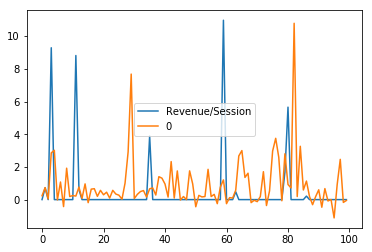

In [278]:
result.head(100).plot()